In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#the homework is to build a classifier to predict whether a customer will recommend a product based on the review text they have filled in.

data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


The homework is to use the Review Text (and any other feature's you'd like) to predict whether someone will recommend (Recommended IND) a product or not.

# Have fun!

You are also welcome to use AutoML if you'd prefer (or both! :)

In [ ]:
#lets create a 
data = data[['Review Text','Recommended IND']]
data.columns = ['Text','Recommend']

In [ ]:
data.head(5)

,Text,Recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
# Inspecting the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       22641 non-null  object
 1   Recommend  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
# Replacing blank variables with 'unknown' ready for processing
data['Text'].fillna('unknown', inplace=True)

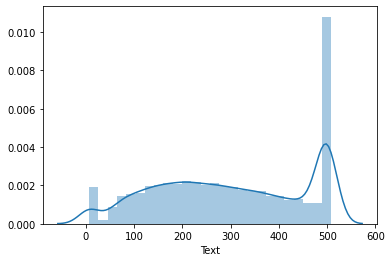

In [ ]:
## Lenght of the Text using KDEplot
lenght = data["Text"].str.len()
sns.distplot(lenght)
plt.show()

In [ ]:
## Checking for stopwords
from nltk.corpus import stopwords
stopwordSet = set(stopwords.words("english"))
stopwordSet

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Processing

In [ ]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [ ]:
print(ps.stem('rocks'))
print(ps.stem('nonwords'))

rock
nonword


In [ ]:
print(lemma.lemmatize('rocks'))
print(lemma.lemmatize('nonwords'))

rock
nonwords


In [ ]:
data["Text"].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Text, dtype: object

In [ ]:
###Regex few details
#What does this regex match: [^a-z]?

#The first character — [ — marks the beginning of a character range. This is ended by the ].

#The next character — ^ — means that the character range is negated, that is, it will only match something not in the range.

#The next three characters — a-z — represent all characters from a to z, ie abcdef...z, the lowercase alphabetic characters.

#Therefore, this regex matches any character which is not a lowercase alphabetic character.

In [ ]:
## Clean the text 
text_reviews = list()
for sentence in data.Text:
    text = re.sub('[^a-zA-Z]'," ", sentence)
    ## Remove punctuation
    text = re.sub('[^\w\s]', " ", sentence)
    ## Remove numbers
    #text = text.str.replace('\d+', '')
    text=re.sub('\d+', " ", sentence)
    ## Remove special characters
    #text = text.apply(lambda x: ([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    #text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    ## Remove whitespaces
    #text = text.apply(lambda x: (x.strip() for x in x.split()))
    #text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    #print(sentence)
    #print(text, '\n')
    text = text.lower()
    text = word_tokenize(text, language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)

In [ ]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(text_reviews).toarray()

In [ ]:
pd.DataFrame(X, columns=cv.get_feature_names()).head()

,able,absolutely,accent,accentuates,accessory,accommodate,accurate,across,actual,actually,add,added,adding,addition,additional,adjust,adjustable,adorable,adore,advice,afraid,ag,age,ago,agree,ahead,air,airy,ala,allow,allows,almost,alone,along,already,also,alteration,altered,alternative,although,...,wonderful,wonderfully,wool,word,wore,work,worked,working,worn,worried,worry,worse,worth,would,woven,wow,wrap,wrinkle,wrinkled,wrist,write,wrong,xl,xs,xsmall,xsp,xx,xxsp,yarn,year,yellow,yes,yesterday,yet,yoga,young,younger,zip,zipped,zipper
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y= data['Recommend']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

In [ ]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.7587346484971108
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       671
           1       0.91      0.95      0.93      3087

    accuracy                           0.88      3758
   macro avg       0.81      0.76      0.78      3758
weighted avg       0.87      0.88      0.88      3758

[[ 382  289]
 [ 160 2927]]


**There are four ways to check if the predictions are right or wrong:**

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

Source: https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397

**Precision** — What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

**F1 score** — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)


**Support**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

**Precision Score**


TP – True Positives

FP – False Positives


Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

In [ ]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_valid,Y_pred)))

Precision score: 0.910136815920398


**Recall Score**


FN – False Negatives

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.


Recall = TP/(TP+FN)



In [ ]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_valid,Y_pred)))

Recall score: 0.9481697440881114


**F1 Score**


F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.


F1 = 2 x (precision x recall)/(precision + recall)



In [ ]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_valid,Y_pred)))

F1 Score: 0.9287640805965413


### Random Forest

In [ ]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))

AUC:  0.6520775793107676
              precision    recall  f1-score   support

           0       0.84      0.32      0.46       671
           1       0.87      0.99      0.92      3087

    accuracy                           0.87      3758
   macro avg       0.85      0.65      0.69      3758
weighted avg       0.86      0.87      0.84      3758



In [ ]:
print(confusion_matrix(y_valid, Y_pred))

[[ 213  458]
 [  41 3046]]


In [ ]:
#precision score
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_valid,Y_pred)))

Precision score: 0.8692922374429224


In [ ]:
#recall score

from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_valid,Y_pred)))

Recall score: 0.9867184969225785


### Naives baye multinomial

In [ ]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.822561272042704
              precision    recall  f1-score   support

           0       0.64      0.73      0.69       671
           1       0.94      0.91      0.93      3087

    accuracy                           0.88      3758
   macro avg       0.79      0.82      0.81      3758
weighted avg       0.89      0.88      0.88      3758

[[ 492  179]
 [ 272 2815]]


In [ ]:
print(confusion_matrix(y_valid, Y_pred))

[[ 492  179]
 [ 272 2815]]


In [ ]:
#precision score
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_valid,Y_pred)))

Precision score: 0.9402137608550434


In [ ]:
#recall score

from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_valid,Y_pred)))

Recall score: 0.9118885649497894


### XGBOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
#y_pred = model.predict(X_test)
Y_pred = model.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.6180596289328306
              precision    recall  f1-score   support

           0       0.79      0.25      0.38       671
           1       0.86      0.99      0.92      3087

    accuracy                           0.85      3758
   macro avg       0.83      0.62      0.65      3758
weighted avg       0.85      0.85      0.82      3758

[[ 168  503]
 [  44 3043]]


In [ ]:
#precision score
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_valid,Y_pred)))

Precision score: 0.8581500282007897


In [ ]:
#recall score

from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_valid,Y_pred)))

Recall score: 0.9857466796242307
